<a href="https://colab.research.google.com/github/juliaschubertpeixoto/gesture_recognition/blob/main/MSRC_12_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.utils import shuffle
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models

#Data Processing

##Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/artigo_IEEE/datasets/MSRC-12 preprocessed data'
os.chdir(path)
X_train = np.load('train_data.npy' ).astype(np.float32)
y_train = np.load('train_tag.npy' ).astype(np.int32)
X_val = np.load('eval_data.npy' ).astype(np.float32)
y_val = np.load('eval_tag.npy' ).astype(np.int32)
print("Data imported successfuly!")

Data imported successfuly!


In [ ]:
X_train.shape

(4192, 667, 80)

In [ ]:
X_train[0][0]

array([2.779996e+09, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.0000

##Split Data

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=42)
print("Data splited successfuly!")
print(" ")
print("Number of samples on training set:", y_train.shape[0])
print("Number of samples on validation set:", y_val.shape[0])
print("Number of samples on test set:", y_test.shape[0] )

Data splited successfuly!
 
Number of samples on training set: 4192
Number of samples on validation set: 1032
Number of samples on test set: 1032


##Normalize data

In [ ]:
new_train_data = tf.reshape(X_train, (-1,667*80)) 
n = MaxAbsScaler() 
n.fit(new_train_data)
newN = n.transform(new_train_data)
X_train = tf.reshape(newN, (-1,667,80))
print("Data normalized successfuly!")

Data normalized successfuly!


In [ ]:
new_val_data = tf.reshape(X_val, (-1,667*80))
X_val_transform = n.transform(new_val_data)
X_val = tf.reshape(X_val_transform, (-1,667,80))
print("Data normalized successfuly!")

Data normalized successfuly!


In [ ]:
new_test_data = tf.reshape(X_test, (-1,667*80))
X_test_transform = n.transform(new_test_data)
X_test = tf.reshape(X_test_transform, (-1,667,80))
print("Data normalized successfuly!")

Data normalized successfuly!


##Reshape Data

Only for Convolutional Neural Network

In [ ]:
train_data_conv = tf.reshape(X_train, (-1,667,80,1))
val_data_conv = tf.reshape(X_val, (-1,667,80,1))
test_data_conv = tf.reshape(X_test, (-1,667,80,1))
print("Data reshaped successfuly!")

Data reshaped successfuly!


#Convolutional Neural Network

##Training

*Proposed Model*

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(667,80,1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=7104, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=12, activation='softmax'))
model.summary()

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 667, 80, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 222, 26, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 26, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 8, 32)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 8, 64)         18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 4, 64)        0

*Training*

In [ ]:
history = model.fit(train_data_conv, y_train,
          validation_data=(val_data_conv, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
420/420 [==============================] - 37s 66ms/step - loss: 2.3268 - accuracy: 0.1808 - val_loss: 2.4152 - val_accuracy: 0.2016
Epoch 2/30
420/420 [==============================] - 27s 64ms/step - loss: 1.7273 - accuracy: 0.3791 - val_loss: 1.4117 - val_accuracy: 0.4932
Epoch 3/30
420/420 [==============================] - 26s 63ms/step - loss: 1.2103 - accuracy: 0.5720 - val_loss: 1.1155 - val_accuracy: 0.6308
Epoch 4/30
420/420 [==============================] - 27s 63ms/step - loss: 0.9655 - accuracy: 0.6644 - val_loss: 1.0635 - val_accuracy: 0.6279
Epoch 5/30
420/420 [==============================] - 27s 65ms/step - loss: 0.8117 - accuracy: 0.7192 - val_loss: 0.9224 - val_accuracy: 0.7006
Epoch 6/30
420/420 [==============================] - 27s 63ms/step - loss: 0.7166 - accuracy: 0.7619 - val_loss: 0.8466 - val_accuracy: 0.7277
Epoch 7/30
420/420 [==============================] - 26s 63ms/step - loss: 0.6105 - accuracy: 0.7879 - val_loss: 0.8191 - val_accuracy:

###Analysis

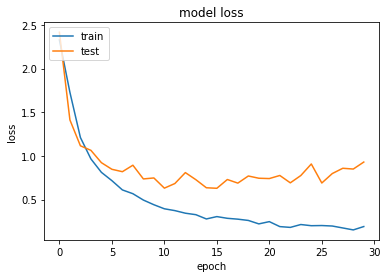

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

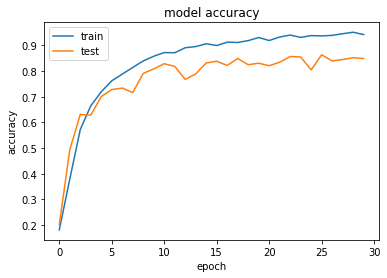

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

###Testing

In [ ]:
y_pred = model.predict(test_data_conv)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.8517441860465116


In [ ]:
print(sklearn.metrics.classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        83
           1       0.77      0.89      0.83        81
           2       0.74      0.84      0.78        74
           3       0.84      0.88      0.86        89
           4       0.82      0.80      0.81       104
           5       0.91      0.86      0.88        83
           6       0.95      0.80      0.87       100
           7       0.75      0.92      0.82        89
           8       0.95      0.86      0.90        85
           9       0.89      0.93      0.91        81
          10       0.85      0.80      0.82        79
          11       0.95      0.87      0.91        84

    accuracy                           0.85      1032
   macro avg       0.86      0.85      0.85      1032
weighted avg       0.86      0.85      0.85      1032



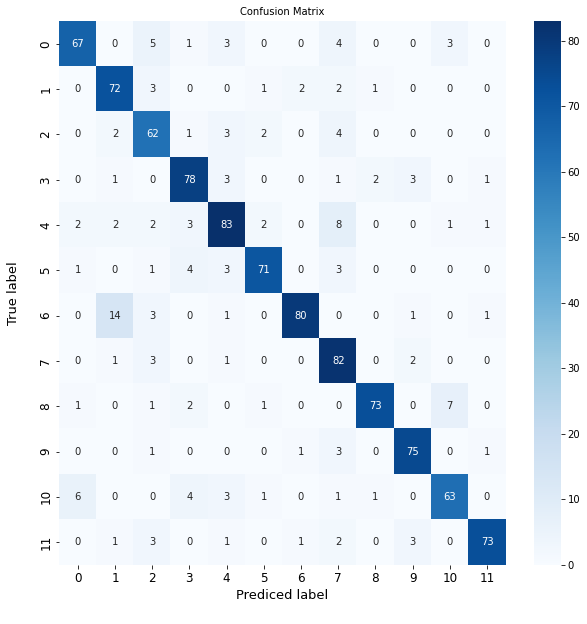

In [ ]:
import seaborn as sns
cm = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=new_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title("Confusion Matrix", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.ylabel('True label\n', fontsize=13)
plt.xlabel('Prediced label\n', fontsize=13)
plt.show()

In [ ]:
for i in range(len(cm)):
  den = sum(cm[i])
  num = cm[i][i]
  accuracy = num/den
  print("Accuracy for gesture", i)
  print('{:2.2%}').format(accuracy)
  print(' ')

Accuracy for gesture 0
80.72289156626506%
 
Accuracy for gesture 1
88.88888888888889%
 
Accuracy for gesture 2
83.78378378378379%
 
Accuracy for gesture 3
87.64044943820225%
 
Accuracy for gesture 4
79.8076923076923%
 
Accuracy for gesture 5
85.54216867469879%
 
Accuracy for gesture 6
80.0%
 
Accuracy for gesture 7
92.13483146067416%
 
Accuracy for gesture 8
85.88235294117646%
 
Accuracy for gesture 9
92.5925925925926%
 
Accuracy for gesture 10
79.74683544303798%
 
Accuracy for gesture 11
86.90476190476191%
 


#Recurrent Neural Network

##Training

*Model*

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(667,80)),   
tf.keras.layers.LSTM(128, return_sequences=True),
tf.keras.layers.LSTM(128, dropout=0.1),
tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(optimizer = 'RMSProp',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 667, 128)          107008    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 12)                1548      
                                                                 
Total params: 240,140
Trainable params: 240,140
Non-trainable params: 0
_________________________________________________________________


*Training*

In [ ]:
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
420/420 [==============================] - 136s 307ms/step - loss: 2.1015 - accuracy: 0.2433 - val_loss: 1.9688 - val_accuracy: 0.2636
Epoch 2/30
420/420 [==============================] - 128s 304ms/step - loss: 1.6538 - accuracy: 0.4043 - val_loss: 1.9792 - val_accuracy: 0.3217
Epoch 3/30
420/420 [==============================] - 128s 304ms/step - loss: 1.4730 - accuracy: 0.4897 - val_loss: 1.3112 - val_accuracy: 0.5455
Epoch 4/30
420/420 [==============================] - 128s 304ms/step - loss: 1.2590 - accuracy: 0.5706 - val_loss: 1.2472 - val_accuracy: 0.5969
Epoch 5/30
420/420 [==============================] - 127s 301ms/step - loss: 1.1717 - accuracy: 0.6045 - val_loss: 1.5025 - val_accuracy: 0.5552
Epoch 6/30
420/420 [==============================] - 127s 301ms/step - loss: 1.0479 - accuracy: 0.6567 - val_loss: 1.0208 - val_accuracy: 0.6609
Epoch 7/30
420/420 [==============================] - 127s 302ms/step - loss: 0.9772 - accuracy: 0.6877 - val_loss: 0.9426 -

###Analysis

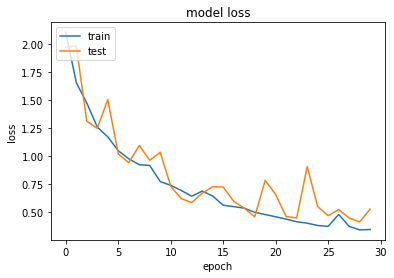

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

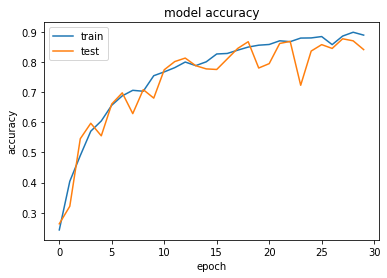

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

###Testing

In [ ]:
y_pred = model.predict(X_test)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.8478682170542635


In [ ]:
print(sklearn.metrics.classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        83
           1       0.91      0.88      0.89        81
           2       0.97      0.77      0.86        74
           3       0.82      0.60      0.69        89
           4       0.79      0.88      0.83       104
           5       0.74      0.90      0.81        83
           6       0.91      0.83      0.87       100
           7       0.94      0.91      0.93        89
           8       0.97      0.84      0.90        85
           9       0.77      0.98      0.86        81
          10       0.82      0.87      0.85        79
          11       0.82      0.93      0.87        84

    accuracy                           0.85      1032
   macro avg       0.86      0.85      0.85      1032
weighted avg       0.86      0.85      0.85      1032



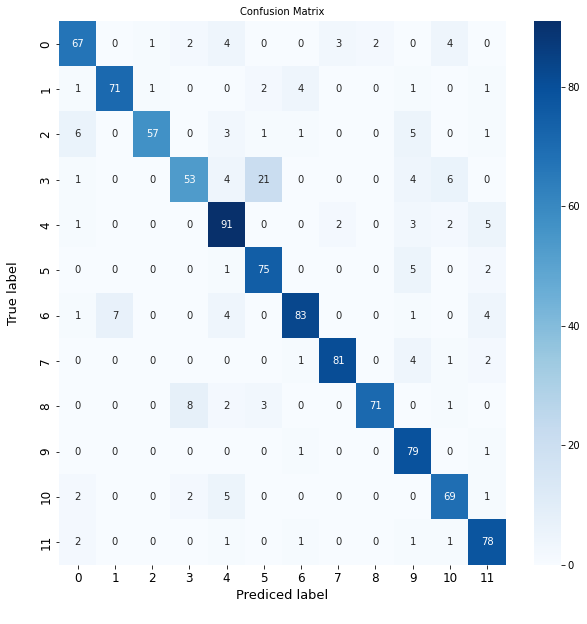

In [ ]:
import seaborn as sns
cm = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=new_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title("Confusion Matrix", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.ylabel('True label\n', fontsize=13)
plt.xlabel('Prediced label\n', fontsize=13)
plt.show()

In [ ]:
for i in range(len(cm)):
  den = sum(cm[i])
  num = cm[i][i]
  accuracy = num/den
  print("Accuracy for gesture", i)
  print(str(accuracy*100)+"%")
  print(' ')

Accuracy for gesture 0
80.72289156626506%
 
Accuracy for gesture 1
87.65432098765432%
 
Accuracy for gesture 2
77.02702702702703%
 
Accuracy for gesture 3
59.55056179775281%
 
Accuracy for gesture 4
87.5%
 
Accuracy for gesture 5
90.36144578313254%
 
Accuracy for gesture 6
83.0%
 
Accuracy for gesture 7
91.01123595505618%
 
Accuracy for gesture 8
83.52941176470588%
 
Accuracy for gesture 9
97.53086419753086%
 
Accuracy for gesture 10
87.34177215189874%
 
Accuracy for gesture 11
92.85714285714286%
 


# GRU

##Training

*Model*

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(667,80)),   
tf.keras.layers.GRU(128, return_sequences=True),
tf.keras.layers.GRU(128, return_sequences=True, dropout=0.1),
tf.keras.layers.Conv1D(60, 1, activation='relu', padding='same'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(12, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 667, 128)          80640     
                                                                 
 gru_1 (GRU)                 (None, 667, 128)          99072     
                                                                 
 conv1d (Conv1D)             (None, 667, 60)           7740      
                                                                 
 flatten (Flatten)           (None, 40020)             0         
                                                                 
 dense (Dense)               (None, 12)                480252    
                                                                 
Total params: 667,704
Trainable params: 667,704
Non-trainable params: 0
_________________________________________________________________


*Training*

In [ ]:
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
420/420 [==============================] - 103s 213ms/step - loss: 2.5794 - accuracy: 0.1562 - val_loss: 8.6127 - val_accuracy: 0.1231
Epoch 2/30
420/420 [==============================] - 87s 208ms/step - loss: 2.2830 - accuracy: 0.2393 - val_loss: 1.8629 - val_accuracy: 0.3256
Epoch 3/30
420/420 [==============================] - 88s 210ms/step - loss: 1.8595 - accuracy: 0.3719 - val_loss: 1.6523 - val_accuracy: 0.4409
Epoch 4/30
420/420 [==============================] - 89s 212ms/step - loss: 1.6021 - accuracy: 0.4616 - val_loss: 1.4629 - val_accuracy: 0.4806
Epoch 5/30
420/420 [==============================] - 86s 205ms/step - loss: 1.3520 - accuracy: 0.5382 - val_loss: 1.2408 - val_accuracy: 0.5775
Epoch 6/30
420/420 [==============================] - 87s 207ms/step - loss: 1.2532 - accuracy: 0.6040 - val_loss: 2.0624 - val_accuracy: 0.3440
Epoch 7/30
420/420 [==============================] - 89s 213ms/step - loss: 1.1245 - accuracy: 0.6419 - val_loss: 1.5020 - val_a

## Analysis

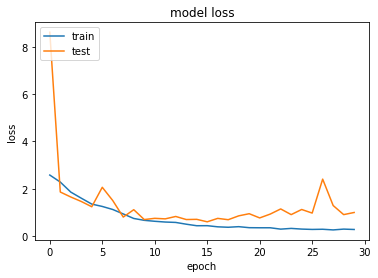

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

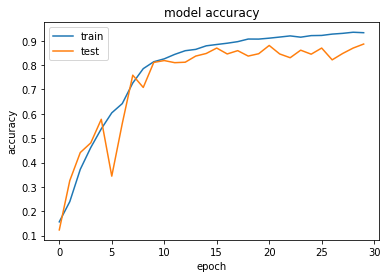

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## Testing

In [ ]:
y_pred = model.predict(X_test)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.8943798449612403


In [ ]:
print(sklearn.metrics.classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        83
           1       0.88      0.91      0.90        81
           2       0.82      0.92      0.87        74
           3       0.84      0.90      0.87        89
           4       0.88      0.84      0.86       104
           5       0.91      0.84      0.88        83
           6       0.93      0.90      0.91       100
           7       0.86      0.94      0.90        89
           8       0.95      0.96      0.96        85
           9       0.90      0.93      0.91        81
          10       0.89      0.90      0.89        79
          11       0.95      0.89      0.92        84

    accuracy                           0.89      1032
   macro avg       0.90      0.90      0.89      1032
weighted avg       0.90      0.89      0.89      1032



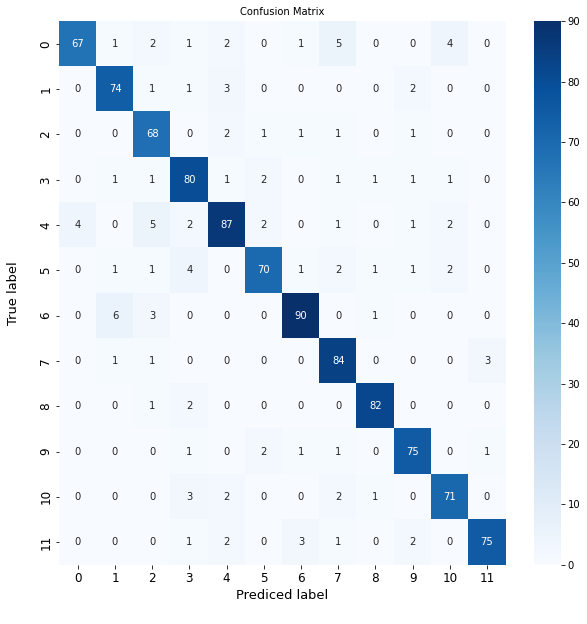

In [ ]:
import seaborn as sns
cm = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=new_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title("Confusion Matrix", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.ylabel('True label\n', fontsize=13)
plt.xlabel('Prediced label\n', fontsize=13)
plt.show()

In [ ]:
for i in range(len(cm)):
  den = sum(cm[i])
  num = cm[i][i]
  accuracy = num/den
  print("Accuracy for gesture", i)
  print(str(accuracy*100)+"%")
  print(' ')

Accuracy for gesture 0
80.72289156626506%
 
Accuracy for gesture 1
91.35802469135803%
 
Accuracy for gesture 2
91.8918918918919%
 
Accuracy for gesture 3
89.8876404494382%
 
Accuracy for gesture 4
83.65384615384616%
 
Accuracy for gesture 5
84.33734939759037%
 
Accuracy for gesture 6
90.0%
 
Accuracy for gesture 7
94.3820224719101%
 
Accuracy for gesture 8
96.47058823529412%
 
Accuracy for gesture 9
92.5925925925926%
 
Accuracy for gesture 10
89.87341772151899%
 
Accuracy for gesture 11
89.28571428571429%
 
